In [11]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical

train = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_train.csv', header = 0)
test = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_test.csv', header = 0)

y_train = train['label'].values
y_test = test['label'].values

x_train = train.drop(['label'],axis=1)
x_test = test.drop(['label'], axis=1)

x_train = np.array(x_train.iloc[:,:])
# print(x_train[:5])
x_train = np.array([np.reshape(i, (28, 28)) for i in x_train])

x_test = np.array(x_test.iloc[:,:])
x_test = np.array([np.reshape(i, (28, 28)) for i in x_test])
# print(x_test[0])

x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print('Training examples:',x_train.shape[0])
print('Test examples:',x_test.shape[0])

print('X_train shape"',x_train.shape)
print('y_train shape"',y_train.shape)
print('X_test shape"',x_test.shape)
print('y_test shape"',y_test.shape)

x_train = x_train.reshape((27455, 28, 28, 1))
x_test = x_test.reshape((7172, 28, 28, 1))

print(x_train.shape)
print(y_train.shape)
# print(x_train[:3])
# print(y_train[:3])

Training examples: 27455
Test examples: 7172
X_train shape" (27455, 28, 28)
y_train shape" (27455, 25)
X_test shape" (7172, 28, 28)
y_test shape" (7172, 25)
(27455, 28, 28, 1)
(27455, 25)


In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

In [13]:
def generateModel():    
    model = Sequential()
    model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(64,activation = 'relu'))
    model.add(Dense(25,activation = 'softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
classifier = generateModel()

In [15]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                200768    
__________

In [16]:
y_train[0].shape

(25,)

In [18]:
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir = 'logs/SLR classifier')

In [19]:
classifier.fit(x_train, y_train, batch_size = 100, epochs = 4, callbacks = [tensorboard])

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
27455/27455 [==============================] - 41s 1ms/step - loss: 1.3582 - acc: 0.5836
Epoch 2/4
27455/27455 [==============================] - 41s 1ms/step - loss: 0.1556 - acc: 0.9526
Epoch 3/4
27455/27455 [==============================] - 38s 1ms/step - loss: 0.0285 - acc: 0.9945
Epoch 4/4
27455/27455 [==============================] - 39s 1ms/step - loss: 0.0095 - acc: 0.9989


In [33]:
# from sklearn.externals import joblib
# joblib.dump(classifier, 'saved_classifier.pkl')

c:\users\meeta\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['saved_classifier.pkl']

In [26]:
y_prediction = classifier.predict(x_test)

In [30]:
y_prediction[:5]

array([[3.29407738e-17, 6.67487604e-13, 6.17939264e-08, 2.29607583e-11,
        2.02390218e-17, 3.12468135e-10, 9.99999881e-01, 7.89398148e-12,
        8.05900730e-18, 8.12791494e-26, 5.13220109e-14, 3.13756061e-08,
        8.41050115e-17, 1.36352138e-10, 3.36344783e-08, 2.19907263e-16,
        5.14869787e-12, 3.79356114e-15, 6.66723477e-15, 2.32878694e-09,
        8.52904038e-14, 4.57920485e-13, 3.39391906e-14, 1.06968503e-10,
        5.55839879e-13],
       [1.46923561e-15, 4.39657888e-04, 1.02128870e-13, 3.14914291e-06,
        2.34751774e-08, 9.99515176e-01, 3.17689972e-12, 4.62092397e-20,
        2.69149268e-07, 7.60722527e-29, 7.24466154e-10, 1.57662744e-10,
        1.49197599e-09, 2.45448051e-10, 5.14151265e-12, 6.94832429e-12,
        3.04834685e-10, 9.86527483e-13, 1.93175038e-06, 5.22637649e-08,
        1.75827335e-08, 4.43766864e-11, 3.97917574e-05, 2.56277422e-09,
        1.05704941e-13],
       [1.80803106e-27, 5.10663083e-12, 2.05226720e-24, 5.74841906e-05,
        1.4360

2


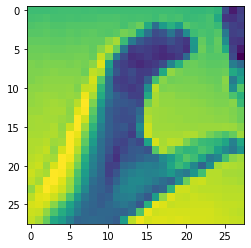

In [21]:
import matplotlib.pyplot as plt
LOC = 20
sample = x_test[LOC]
plt.imshow(sample.reshape((28,28)))
lbl = y_test[LOC]
print(list(lbl).index(1))

In [22]:
sample = sample.reshape((1,28,28,1))
res = classifier.predict(sample)
res = list(res[0])
print(res)

[1.5401208e-24, 5.107733e-16, 0.99999976, 2.5427492e-31, 8.062581e-16, 9.8662856e-11, 1.3991978e-15, 1.0495614e-33, 7.359502e-34, 0.0, 0.0, 2.2563282e-09, 4.0845395e-19, 1.1016347e-20, 1.948517e-07, 1.0003945e-34, 1.4730906e-31, 2.2220498e-32, 3.104741e-23, 1.4609001e-19, 6.798345e-30, 8.297531e-32, 7.449474e-24, 1.1634812e-15, 2.4633596e-32]


In [23]:
mx = max(res)
print(res.index(mx))

2
